# Problem 2 - 2x2 Gridworld Value Iteration

## Problem Statement

We consider a simple 2x2 gridworld with:

- **States**: $S = \{s_1, s_2, s_3, s_4\}$
- **Actions**: $A = \{\text{up}, \text{down}, \text{left}, \text{right}\}$
- **Initial Policy**: For all states, $pi(\text{up}|s) = 1$
- **Transition Probabilities**: $P(s'|s, a)$
  - If an action is valid (does not hit a wall), the transition is deterministic to the adjacent state.
  - Otherwise, the next state is the same as the current state.
- **Rewards**:
  - $R(s_1) = 5$
  - $R(s_2) = 10$
  - $R(s_3) = 1$
  - $R(s_4) = 2$

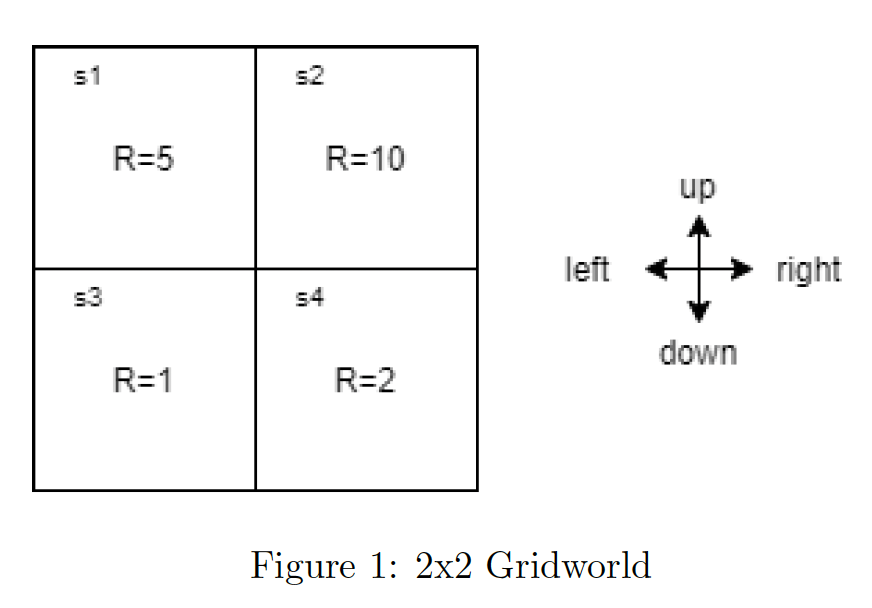

## Value Iteration Setup

- **Discount factor $\gamma$**: 

  Assume $\gamma = 1$ (since not specified)
  
- **Value function initialization**:
  
  $V_0(s) = 0 \quad \forall s \in S$
  


## Iteration 1

### 1. Initial Value Function $V_0$

- $V_0(s)$ is 0 for each State $s_1$ ~ $s_4$

| State | $V_0(s)$ |
|-------|------------|
| $s_1$ | 0          |
| $s_2$ | 0          |
| $s_3$ | 0          |
| $s_4$ | 0          |

### 2. Value Function Update $V_1$

Recall value iteration update equation:

$V_{k+1}(s) = \max_{a \in A} \sum_{s'} P(s'|s,a) \left[ R(s') + \gamma V_k(s') \right]$

For each state:

- $s_1$:
  - Actions:
    - up: invalid (wall), stays at $s_1$, reward 5
    - down: valid to $s_3$, reward 1
    - left: invalid (wall), stays at $s_1$, reward 5
    - right: valid to $s_2$, reward 10
  - Values:
    - up: $5 + 0 = 5$
    - down: $1 + 0 = 1$
    - left: $5 + 0 = 5$
    - right: $10 + 0 = 10$
  - Max: **10**

- $s_2$:
  - Actions:
    - up: invalid (wall), stays $s_2$, reward 10
    - down: valid to $s_4$, reward 2
    - left: valid to $s_1$, reward 5
    - right: invalid (wall), stays $s_2$, reward 10
  - Values:
    - up: 10
    - down: 2
    - left: 5
    - right: 10
  - Max: **10**

- $s_3$:
  - Actions:
    - up: valid to $s_1$, reward 5
    - down: invalid (wall), stays $s_3$, reward 1
    - left: invalid (wall), stays $s_3$, reward 1
    - right: valid to $s_4$, reward 2
  - Values:
    - up: 5
    - down: 1
    - left: 1
    - right: 2
  - Max: **5**

- $s_4$:
  - Actions:
    - up: valid to $s_2$, reward 10
    - down: invalid (wall), stays $s_4$, reward 2
    - left: valid to $s_3$, reward 1
    - right: invalid (wall), stays $s_4$, reward 2
  - Values:
    - up: 10
    - down: 2
    - left: 1
    - right: 2
  - Max: **10**

### 3. Updated Value Function $V_1$:

| State | $V_1(s)$ |
|-------|------------|
| $s_1$ | 10         |
| $s_2$ | 10         |
| $s_3$ | 5          |
| $s_4$ | 10         |

## Iteration 2

Given the discount factor $\gamma = 1$, for deterministic transitions:

$V_{k+1}(s) = \max_{a \in A} (R(s') + V_k(s'))$


where $s'$ is the next state after taking action $a$ from state $s$.

Applying the update formula again with $V_1$:

- $s_1$:
  - up: stays $s_1$, reward $5 + V_1(s_1)=10 = 15$
  - down: goes $s_3$, reward $1 + V_1(s_3)=5 = 6$
  - left: stays $s_1$, reward $5 + V_1(s_1)=10 = 15$
  - right: goes $s_2$, reward $10 + V_1(s_2)=10 = 20$
  - Max: **20**

- $s_2$:
  - up: stays $s_2$, reward $10 + V_1(s_2)=10 = 20$
  - down: goes $s_4$, reward $2 + V_1(s_4)=10 = 12$
  - left: goes $s_1$, reward $5 + V_1(s_1)=10 = 15$
  - right: stays $s_2$, reward $10 + V_1(s_2)=10 = 20$
  - Max: **20**

- $s_3$:
  - up: goes $s_1$, reward $5 + V_1(s_1)=10 = 15$
  - down: stays $s_3$, reward $1 + V_1(s_3)=5 = 6$
  - left: stays $s_3$, reward $1 + V_1(s_3)=5 = 6$
  - right: goes $s_4$, reward $2 + V_1(s_4)=10 = 12$
  - Max: **15**

- $s_4$:
  - up: goes $s_2$, reward $10 + V_1(s_2)=10 = 20$
  - down: stays $s_4$, reward $2 + V_1(s_4)=10 = 12$
  - left: goes $s_3$, reward $1 + V_1(s_3)=5 = 6$
  - right: stays $s_4$, reward $2 + V_1(s_4)=10 = 12$
  - Max: **20**

### Updated Value Function $V_2$:

| State | $V_2(s)$ |
|-------|------------|
| $s_1$ | 20         |
| $s_2$ | 20         |
| $s_3$ | 15         |
| $s_4$ | 20         |


## Summary

By iteratively updating value functions using value iteration, the agent improves estimates of the expected cumulative reward per state. After two iterations, the values have increased, indicating better understanding of potential future rewards under the optimal policy.